In [139]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

In [140]:
from sklearn.impute import KNNImputer

In [141]:
data=pd.read_csv('scaler_clustering.csv')

In [142]:
data.head()

,Unnamed: 0,company_hash,email_hash,orgyear,ctc,job_position,ctc_updated_year
0,0,atrgxnnt xzaxv,6de0a4417d18ab14334c3f43397fc13b30c35149d70c05...,2016.0,1100000,Other,2020.0
1,1,qtrxvzwt xzegwgbb rxbxnta,b0aaf1ac138b53cb6e039ba2c3d6604a250d02d5145c10...,2018.0,449999,FullStack Engineer,2019.0
2,2,ojzwnvwnxw vx,4860c670bcd48fb96c02a4b0ae3608ae6fdd98176112e9...,2015.0,2000000,Backend Engineer,2020.0
3,3,ngpgutaxv,effdede7a2e7c2af664c8a31d9346385016128d66bbc58...,2017.0,700000,Backend Engineer,2019.0
4,4,qxen sqghu,6ff54e709262f55cb999a1c1db8436cb2055d8f79ab520...,2017.0,1400000,FullStack Engineer,2019.0


In [143]:
data.drop('Unnamed: 0', axis=1, inplace=True)

In [144]:
data.head()

,company_hash,email_hash,orgyear,ctc,job_position,ctc_updated_year
0,atrgxnnt xzaxv,6de0a4417d18ab14334c3f43397fc13b30c35149d70c05...,2016.0,1100000,Other,2020.0
1,qtrxvzwt xzegwgbb rxbxnta,b0aaf1ac138b53cb6e039ba2c3d6604a250d02d5145c10...,2018.0,449999,FullStack Engineer,2019.0
2,ojzwnvwnxw vx,4860c670bcd48fb96c02a4b0ae3608ae6fdd98176112e9...,2015.0,2000000,Backend Engineer,2020.0
3,ngpgutaxv,effdede7a2e7c2af664c8a31d9346385016128d66bbc58...,2017.0,700000,Backend Engineer,2019.0
4,qxen sqghu,6ff54e709262f55cb999a1c1db8436cb2055d8f79ab520...,2017.0,1400000,FullStack Engineer,2019.0


In [145]:
data.shape

(205843, 6)

In [146]:
data.isnull().sum()

company_hash           44
email_hash              0
orgyear                86
ctc                     0
job_position        52564
ctc_updated_year        0
dtype: int64

In [147]:
data.duplicated().sum()

34

In [148]:
data.drop_duplicates(keep='first', inplace=True)

In [149]:
#Remove outliers from the ctc column

In [150]:
ctc_iqr=data['ctc'].quantile(.75)-data['ctc'].quantile(.25)

In [151]:
ctc_ul=data['ctc'].quantile(.75)+(1.5*ctc_iqr)

In [152]:
data_copy=data.copy()

In [153]:
data_copy.loc[data_copy['ctc']>ctc_ul, 'ctc']=ctc_ul

<Axes: >

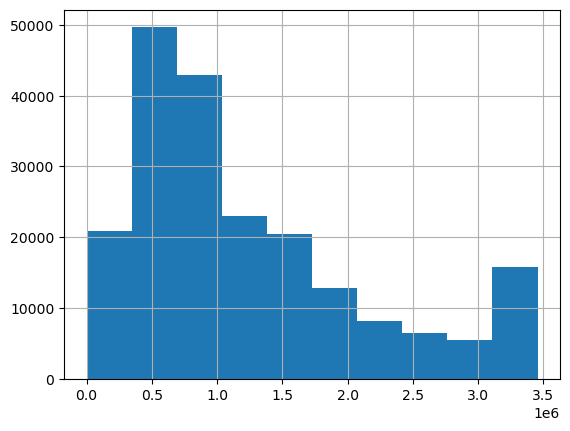

In [154]:
data_copy['ctc'].hist()

In [155]:
data_copy[data_copy['ctc'].transform(lambda x: x>x.quantile(.9))]

,company_hash,email_hash,orgyear,ctc,job_position,ctc_updated_year
25,nxbto xzntqztn,d2668cb959e5657c3881413257b9850caa1359c7ce959a...,2015.0,3455000,Backend Engineer,2019.0
38,evzzxt bvt,69ef6838be8ee5b628375b4cc160ba54c1f7cab8c3b130...,2006.0,3455000,QA Engineer,2019.0
48,rgfto wgbuvzxto xzw,7ce201f4f032c2af65b5d11f549de91ea3e62920834e72...,2020.0,3010000,NaN,2019.0
93,xb v onhatzn,2b0daf6243847309e75a47fb22e9e3dc3f79031edf464a...,2021.0,3455000,Android Engineer,2020.0
105,xzntr wgqugqvnxgz,9d36f0c8a35e49229e2171f8c9d4a706fef7e166684c03...,2017.0,2900000,NaN,2019.0
...,...,...,...,...,...,...
205817,wxowg ojntbo,a74c83782bc88928dd12b103c09697fbef87d15bd308d3...,2011.0,3327000,NaN,2019.0
205821,rxnyxhb ntwyzgrgsxto,3def1401b5a8879eeb4a8465663a9c6c66702c85444d7e...,2012.0,3455000,NaN,2016.0
205825,vbvkgz,95023bca0172ad67bfc3453550c5cf056557bc2c8c7169...,2016.0,3455000,NaN,2020.0
205833,vbvkgz,f4415be48a1ef885e086dcd72181f667a289641e66f828...,2014.0,3455000,NaN,2019.0


In [156]:
data_copy.drop(data_copy[data_copy['orgyear'].isnull()].index, inplace=True)

In [157]:
data_copy.drop(data_copy[data_copy['company_hash'].isnull()].index, inplace=True)

In [158]:
data_copy.isnull().sum()

company_hash            0
email_hash              0
orgyear                 0
ctc                     0
job_position        52493
ctc_updated_year        0
dtype: int64

In [159]:
data_copy.shape

(205679, 6)

In [160]:
data_copy['orgyear']=data_copy['orgyear'].astype('int').astype('object')
data_copy['ctc_updated_year']=data_copy['ctc_updated_year'].astype('int').astype('object')

In [161]:
data_copy['orgyear'].unique()

array([2016, 2018, 2015, 2017, 2019, 2020, 2012, 2013, 2003, 2006, 2014,
       2011, 2021, 2008, 2004, 2022, 2009, 2005, 2010, 2007, 2000, 2002,
       2023, 2001, 1981, 2031, 2024, 1996, 1999, 2106, 1997, 1994, 1995,
       1992, 1973, 1991, 1998, 1990, 1993, 1988, 2025, 2029, 0, 208, 1985,
       209, 206, 1982, 2026, 1970, 2101, 1972, 2107, 1986, 1989, 91, 1987,
       3, 2027, 2, 1976, 4, 5, 1971, 1977, 1984, 83, 1, 1979, 2028, 2204,
       38, 1900, 201, 6, 20165, 200], dtype=object)

In [162]:
data_copy['ctc_updated_year'].unique()

array([2020, 2019, 2021, 2017, 2016, 2015, 2018], dtype=object)

In [163]:
data_copy_new=data_copy[data_copy['orgyear'].isin(range(1970,2024))] #Take only the relevant years

In [164]:
data_copy_new.shape

(205549, 6)

<Axes: >

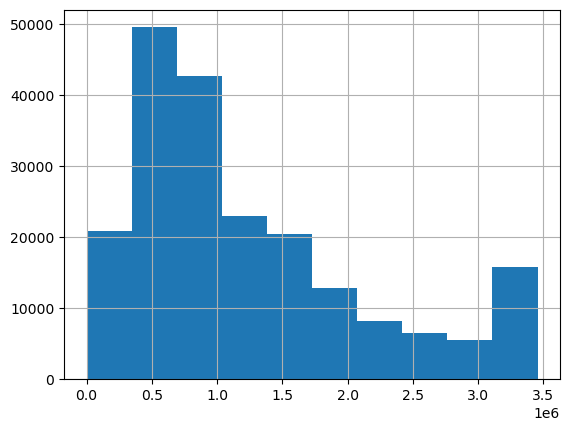

In [165]:
data_copy_new['ctc'].hist()

In [166]:
data.groupby('job_position')['ctc'].mean().sort_values(ascending=False)[:20] #Highest paying jobs before removing ctc outliers

job_position
Computer Scientist 2       1.000000e+08
Telar                      1.000000e+08
Business Man               1.000000e+08
7033771951                 1.000000e+08
Reseller                   1.000000e+08
Data entry                 1.000000e+08
Jharkhand                  1.000000e+08
Seleceman                  9.990000e+07
Safety officer             9.990000e+07
Driver                     9.500000e+07
Senior System Engineer     5.360000e+07
Teaching                   5.035000e+07
Owner                      5.010000e+07
Assistant manager          3.373333e+07
Computer Faculty           2.400000e+07
Applications Engineer 2    1.670000e+07
Software Test Engineer     1.386250e+07
Security Intern            1.100000e+07
Electric power supply      1.000000e+07
Toyota                     1.000000e+07
Name: ctc, dtype: float64

In [167]:
data_copy_new.groupby('job_position')['ctc'].mean().sort_values(ascending=False) #Highest paying jobs-most of them are not what we want to see ourselves in at Scaler

job_position
Driver                                                             3455000.0
Applied Scientist                                                  3455000.0
Safety officer                                                     3455000.0
Software Engineering Co-Op                                         3455000.0
Head of Engineering                                                3455000.0
                                                                     ...    
Matlab programmer                                                    10000.0
Some data entry operator like some copy's write.type and upload      10000.0
Full-stack web developer                                              7500.0
Technical consultant                                                  2000.0
New graduate                                                          2000.0
Name: ctc, Length: 1016, dtype: float64

In [168]:
data_copy_new.replace({'FullStack Engineer':'Fullstack Engineer'},inplace=True)

/var/folders/c5/jzdz65t53qj6w2j6h9rj5sr80000gn/T/ipykernel_1822/1114795469.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data_copy_new.replace({'FullStack Engineer':'Fullstack Engineer'},inplace=True)
/var/folders/c5/jzdz65t53qj6w2j6h9rj5sr80000gn/T/ipykernel_1822/1114795469.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_copy_new.replace({'FullStack Engineer':'Fullstack Engineer'},inplace=True)


In [169]:
highest_sought_jobs=data_copy_new['job_position'].value_counts()[:20] #These are the top jobs that people apply to at Scler

In [170]:
highest_sought_jobs.index #This contains spelling errors so multiple duplicates

Index(['Backend Engineer', 'Fullstack Engineer', 'Other', 'Frontend Engineer',
       'Engineering Leadership', 'QA Engineer', 'Data Scientist',
       'Android Engineer', 'SDET', 'Devops Engineer', 'Support Engineer',
       'Data Analyst', 'iOS Engineer', 'Engineering Intern',
       'Product Designer', 'Backend Architect', 'Research Engineers',
       'Product Manager', 'Program Manager', 'Non Coder'],
      dtype='object', name='job_position')

In [171]:
highest_sought_jobs=data_copy_new['job_position'].value_counts()[:20] #These are the top jobs that people apply to at Scler

In [172]:
#list(highest_sought_jobs.index)

In [173]:
data_copy_new=data_copy_new[data_copy_new['job_position'].isin(list(highest_sought_jobs.index))]

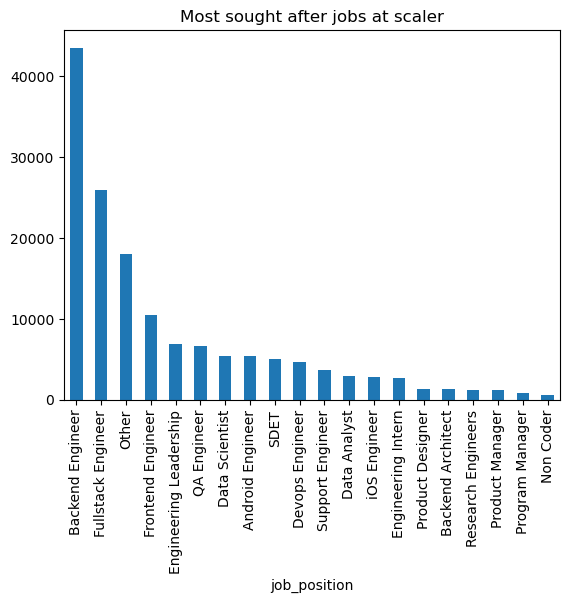

In [174]:
data_copy_new['job_position'].value_counts().plot(kind='bar')
plt.title('Most sought after jobs at scaler')
plt.show()

In [175]:
data_copy_new.shape

(149952, 6)

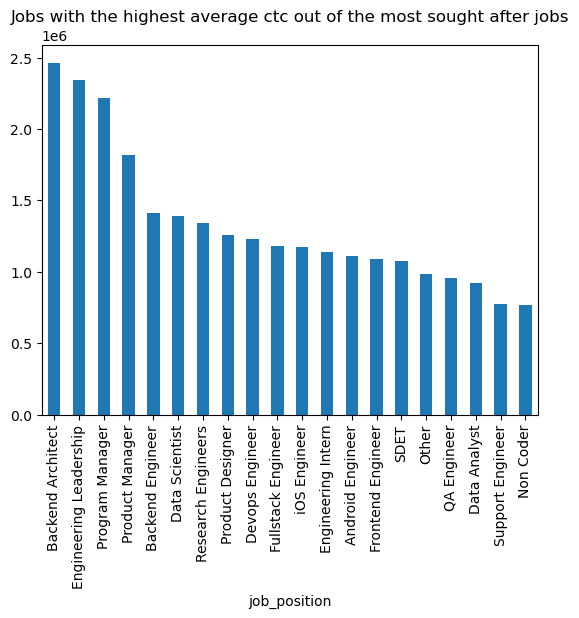

In [176]:
data_copy_new.groupby('job_position')['ctc'].mean().sort_values(ascending=False).plot(kind='bar')
plt.title('Jobs with the highest average ctc out of the most sought after jobs')
plt.show()

In [177]:
data_copy_new[data_copy_new['job_position']=='Backend Architect'].groupby('company_hash')['ctc'].mean().sort_values(ascending=False) #best paying companies for backend architect jobs

company_hash
vnn                             3455000.0
ktnv srgmvr                     3455000.0
vbvkgz                          3455000.0
hzxnta ntwyzgrgsxto             3455000.0
vbtqxwvz tduqtoo                3455000.0
                                  ...    
bxzxonqj ge ytvrny vqstznxzv      40000.0
zom                               30000.0
vohqxgz                           25000.0
zvhpqxwgb                         10000.0
whmvonxgz wgzohrnxzs ucn rna      10000.0
Name: ctc, Length: 748, dtype: float64

In [178]:
data_copy_new[data_copy_new['job_position']=='Backend Engineer'].groupby('company_hash')['ctc'].mean().sort_values(ascending=False)

company_hash
urvnt xi                  3455000.0
xnxav                     3455000.0
uvrrvaxgb                 3455000.0
oyguxej                   3455000.0
uvqph  nyt uvqpxzs vuu    3455000.0
                            ...    
uvqtng                       2000.0
qgoorjz avnv ntwy            2000.0
f5qnw                        1500.0
wvunxej                      1000.0
zhbmqo                       1000.0
Name: ctc, Length: 9754, dtype: float64

In [179]:
data_copy_new[data_copy_new['job_position']=='Fullstack Engineer'].groupby('company_hash')['ctc'].mean().sort_values(ascending=False)

company_hash
hzxnta onvnto ongct wgbuvzj                      3455000.0
bta                                              3455000.0
ihxu                                             3455000.0
btafxzs                                          3455000.0
vacvzwta uqgsqvbo                                3455000.0
                                                   ...    
bnyqtt wgzohrnxzs                                   1000.0
hzxctqoxava wtznqvr bvqnv vmqth at rvo cxrrvo       1000.0
pzgn bj jvwyn                                       1000.0
uvznohxn uqgetooxgzvr                               1000.0
xehnhqt                                             1000.0
Name: ctc, Length: 8452, dtype: float64

In [180]:
data_copy_new[data_copy_new['job_position']=='Engineering Leadership'].groupby('company_hash')['ctc'].mean().sort_values(ascending=False)

company_hash
yxsyi                                    3455000.0
jhbt xzaxv ucn rna mj qyjnybgzt urw      3455000.0
cxmqgo xzzgcvnxgzo                       3455000.0
ke xnw                                   3455000.0
cxontgz ntwyzxwvr vza otqcxwto wtznqt    3455000.0
                                           ...    
exzavmxrxnj owxtzwto                        8000.0
oxzsntr                                     3000.0
7vfx                                        3000.0
uqtaxwnxct owxtzwt                          2000.0
evxqmxn                                     1000.0
Name: ctc, Length: 3406, dtype: float64

In [181]:
data_copy_new[data_copy_new['job_position']=='Program Manager'].groupby('company_hash')['ctc'].mean().sort_values(ascending=False) #best paying companies for backend architect jobs

company_hash
uyxrxuo                          3455000.0
st axsxnvr tztqsj wgzztwnxgzo    3455000.0
uyxrxuo xzzgcvnxgz wvbuho        3455000.0
fxmbg                            3455000.0
obvrr mhoxztoo gfztq             3455000.0
                                   ...    
gnytqo                             93000.0
cgrpofvstz                         63000.0
ctqovwt                            32000.0
qvuxag                             18000.0
vwwxgz rvmo                        14000.0
Name: ctc, Length: 582, dtype: float64

In [182]:
data_copy_new[data_copy_new['job_position']=='Product Manager'].groupby('company_hash')['ctc'].mean().sort_values(ascending=False) #best paying companies for backend architect jobs

company_hash
zxzlvwvqn                3455000.0
soz wvoxzg               3455000.0
tdutaxv xzw              3455000.0
tctzn bvznqv             3455000.0
tctqntvb ogenfvqt        3455000.0
                           ...    
ztnwqvwptq ntwyzgrgsj      10000.0
lvqcxo                      9000.0
mmag                        7000.0
bgavp vzvrjnxwo             6000.0
fgqpavj                     2000.0
Name: ctc, Length: 855, dtype: float64

In [183]:
#We see that the top companies at the top have the same average salaries for any role, however the salaries differ significantly for the companies at the bottom of the list
#This leads me to believe that at higher salaries do not depend on the company or on the role

In [184]:
data_copy_new['years_to_jump']=data_copy_new['ctc_updated_year']-data_copy_new['orgyear']+1

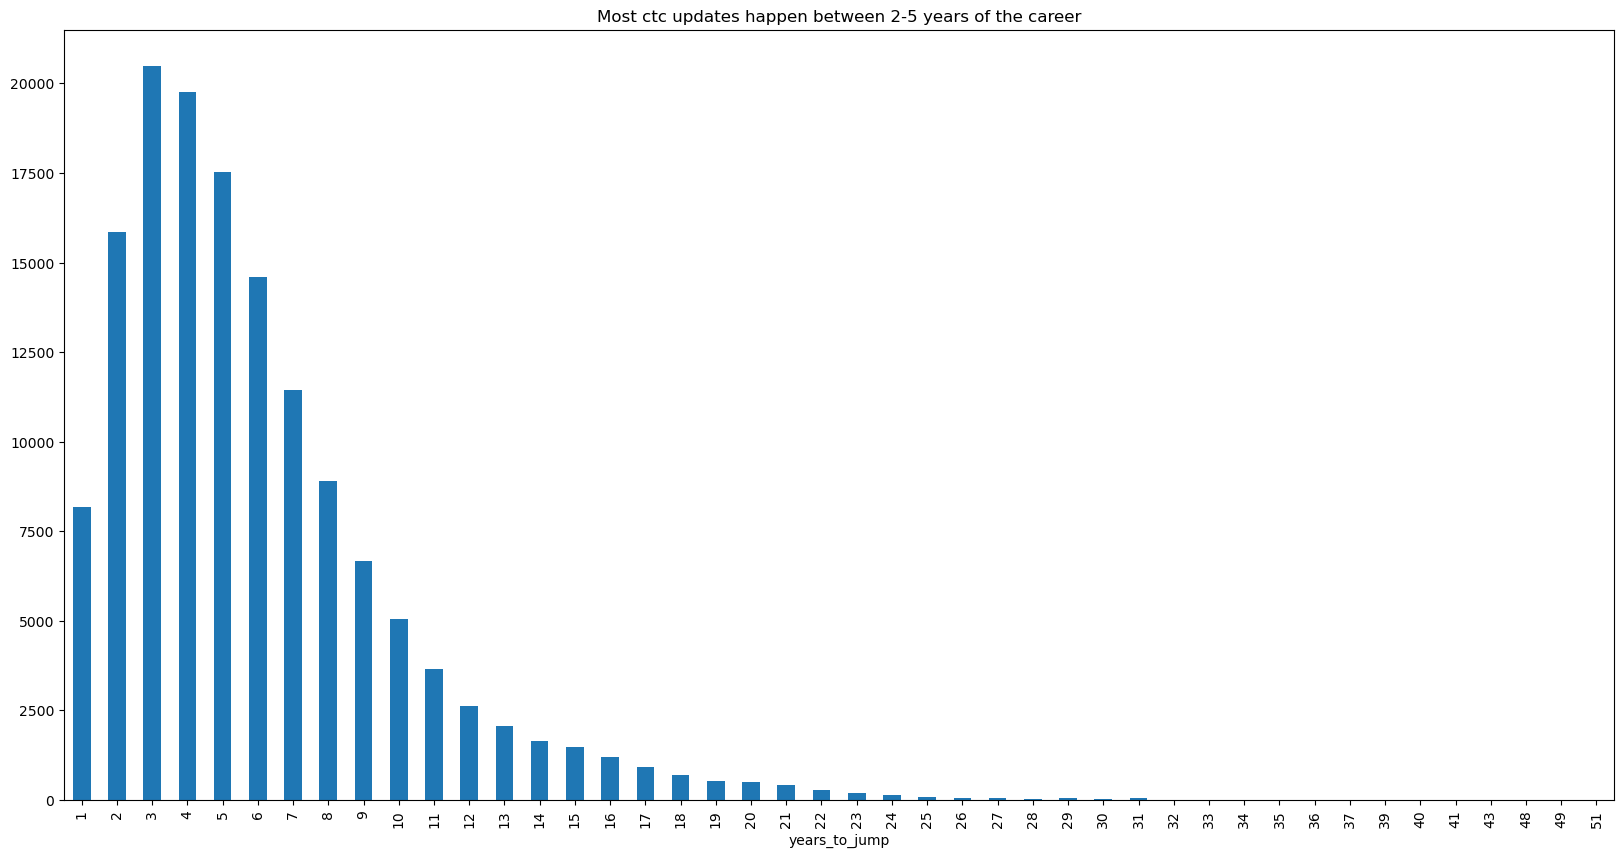

In [185]:
plt.figure(figsize=(20,10))
data_copy_new[data_copy_new['years_to_jump']>0]['years_to_jump'].value_counts().sort_index().plot(kind='bar')
plt.title('Most ctc updates happen between 2-5 years of the career')
plt.show()
#Maximum number of ctc updates are happening within 3-5 years
#Hence 5 years is the ideal time to change jobs, beyond which the number of people getting ctc updates slow down

In [186]:
data_copy_new['exp_years']=2025-data_copy_new['orgyear']

<Axes: >

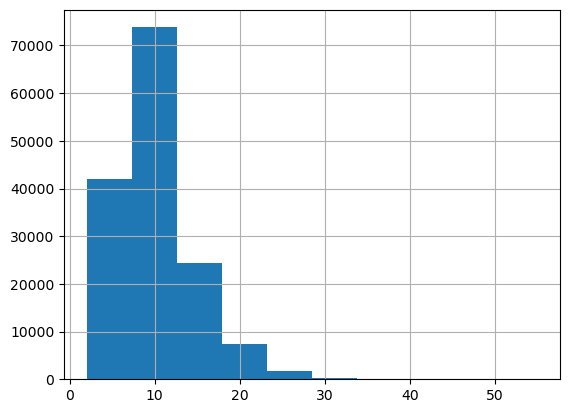

In [425]:
data_copy_new['exp_years'].hist()
#We see that the maximum number of learners have an experience of around 10 years or less
#There are some 25000 people who have between 10 and 20 years of experience, still the ctc growth for most people is predictable given what we have seen

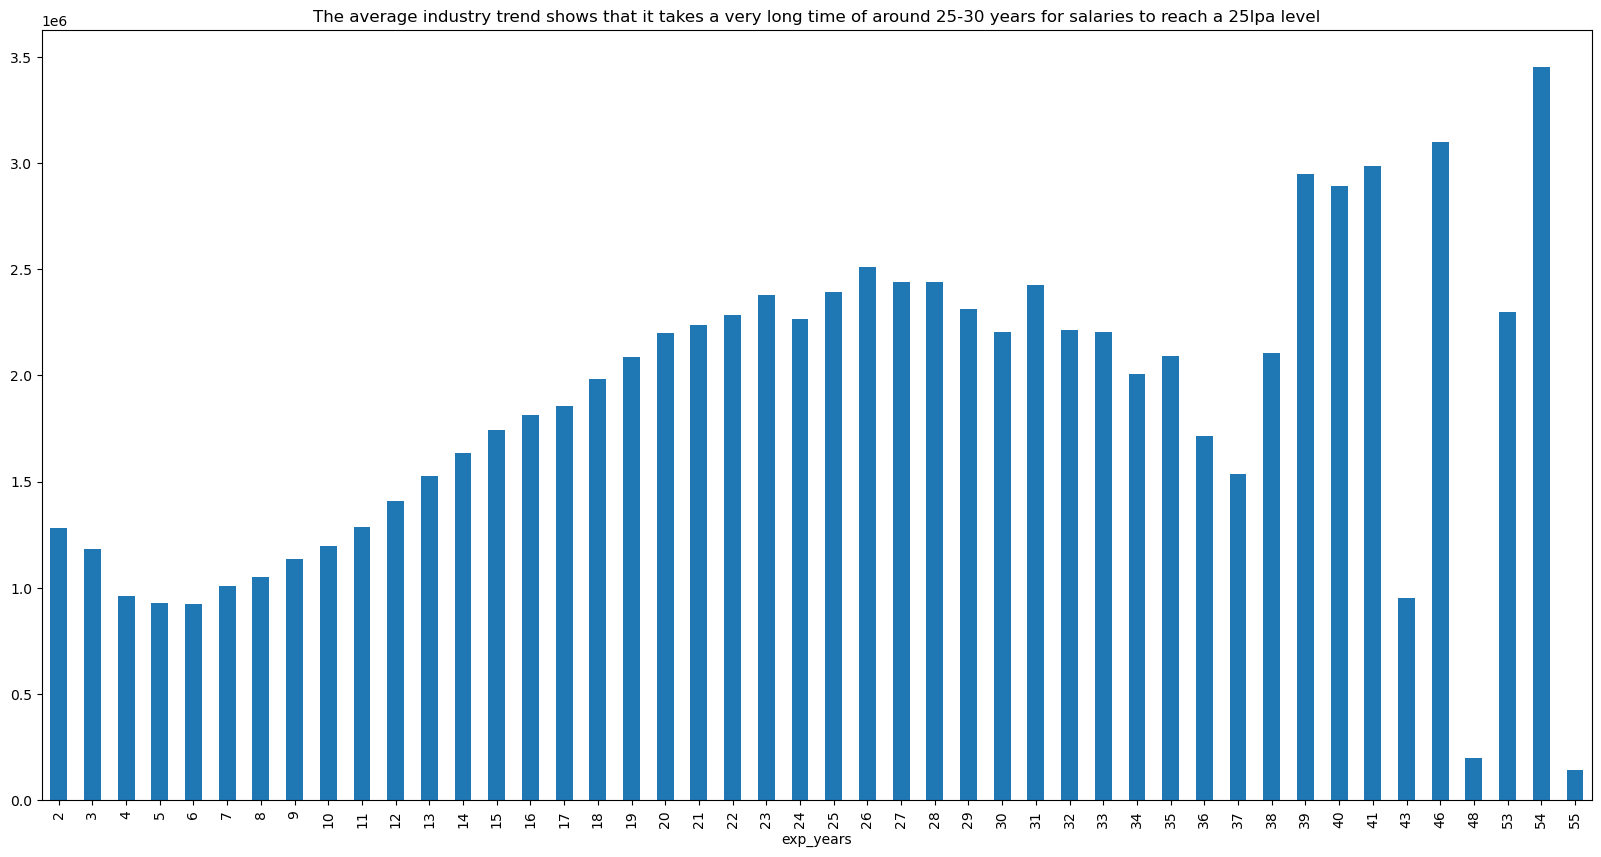

In [220]:
plt.figure(figsize=(20,10))
data_copy_new.groupby('exp_years')['ctc'].mean().plot(kind='bar')
plt.title('The average industry trend shows that it takes a very long time of around 25-30 years for salaries to reach a 25lpa level')
plt.show()
#I will now check for each type of job

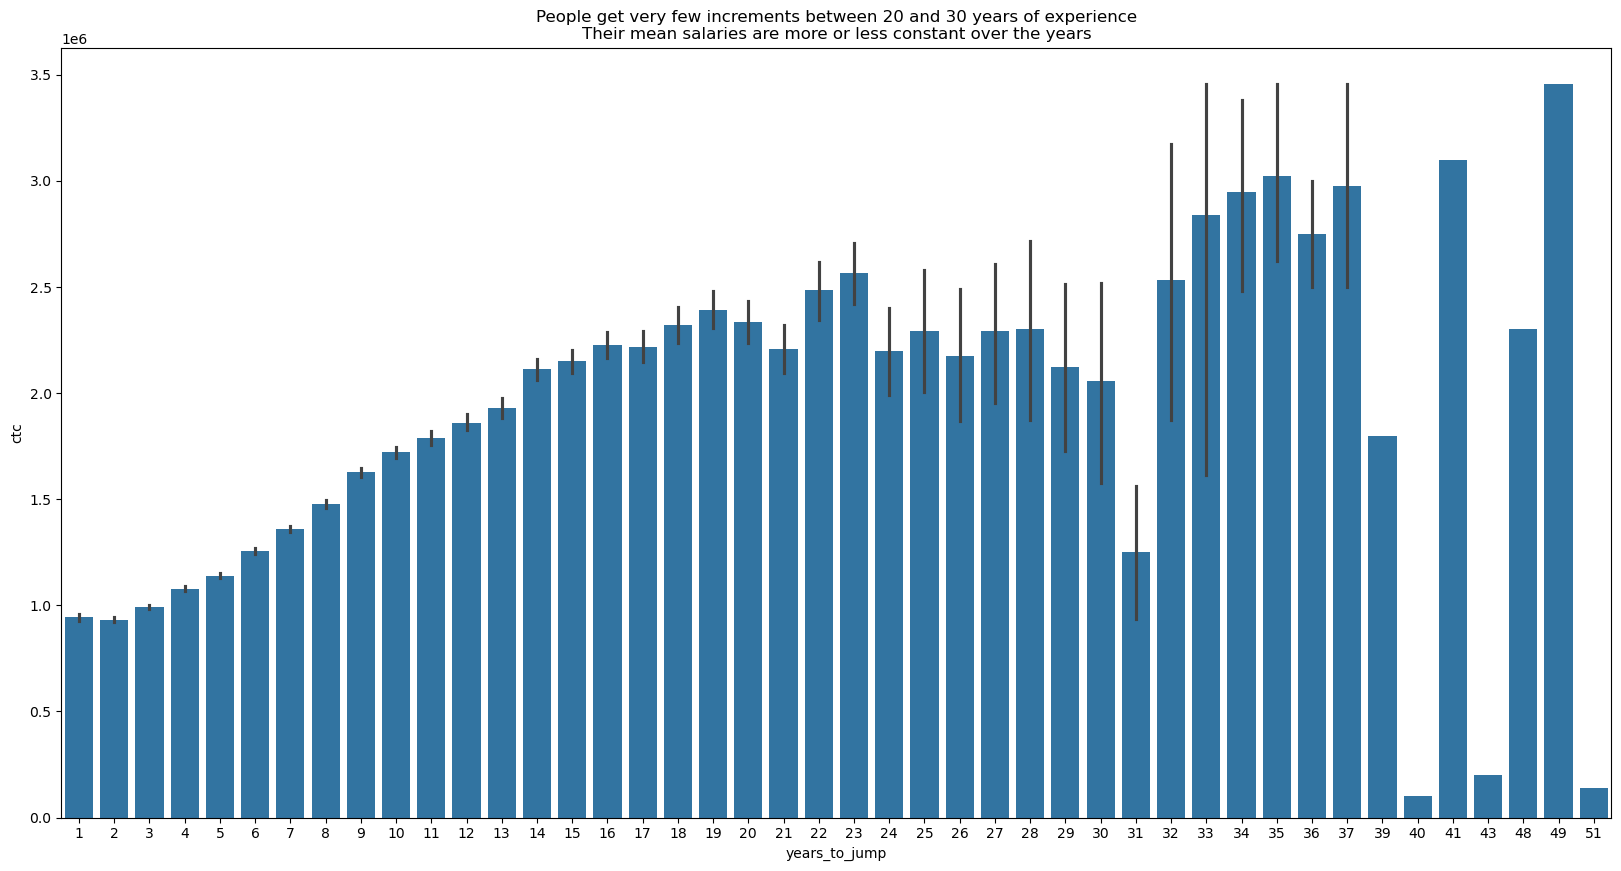

In [227]:
plt.figure(figsize=(20,10))
sns.barplot(x='years_to_jump', y='ctc', data=data_copy_new[data_copy_new['years_to_jump']>0])
plt.title('People get very few increments between 20 and 30 years of experience\nTheir mean salaries are more or less constant over the years')
plt.show()
#Also if we see the error bars in the graph, the variation in the ctc is very high after 20 years of experience

In [230]:
data_copy_new['salary_ranges']=pd.qcut(data_copy_new['ctc'], q=4, labels=[0,1,2,3])

In [231]:
data_copy_new['exp_ranges']=pd.qcut(data_copy_new['exp_years'], q=4,labels=[0,1,2,3])

In [243]:
data_copy_new.columns

Index(['company_hash', 'email_hash', 'orgyear', 'ctc', 'job_position',
       'ctc_updated_year', 'years_to_jump', 'exp_years', 'salary_ranges',
       'exp_ranges'],
      dtype='object')

In [244]:
#data_copy_new[data_copy_new['job_position']=='Engineering Leadership'].groupby('exp_years')['ctc'].mean().plot(kind='bar')

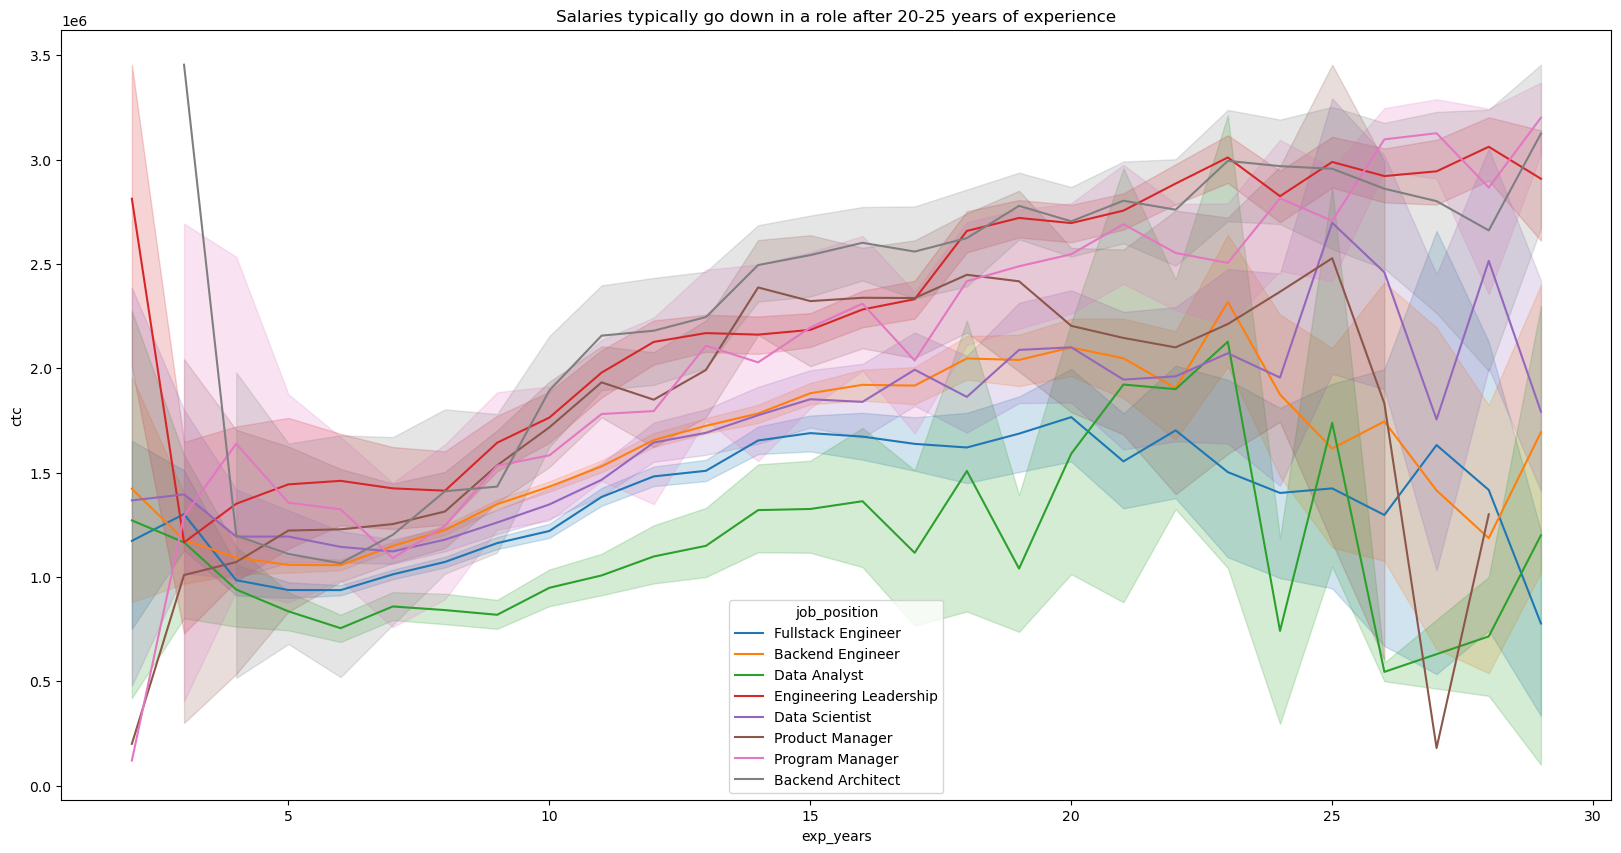

In [246]:
plt.figure(figsize=(20,10))
temp_data=data_copy_new[data_copy_new['job_position'].isin(['Backend Architect', 'Engineering Leadership', 'Program Manager','Product Manager','Fullstack Engineer','Backend Engineer','Data Scientist','Data Analyst']) & (data_copy_new['exp_years']<30)]
sns.lineplot(x='exp_years', y='ctc', hue='job_position',data=temp_data)
plt.title('Salaries typically go down in a role after 20-25 years of experience')
plt.show()

In [249]:
#the other thing we notice here is that initially, the salaries for some roles tend to be similar.
#For example, until about 20 years of experience, the salary of a backend architect and engineering leader follow a very similar path.
#similarly data scientist and backend engineer salaries are correlated at least initially
#Finally, data analyst salaries align to the same levels as full stack developers

In [250]:
#Zooming in to show the trend I highlighted above

In [251]:
temp_new=data_copy_new[data_copy_new['exp_years']<=20]
temp_new=temp_new[temp_new['job_position'].isin(['Backend Architect', 'Engineering Leadership','Program Manager','Product Manager', 'Fullstack Engineer','Backend Engineer','Data Scientist','Data Analyst'])]

<Axes: xlabel='exp_years', ylabel='ctc'>

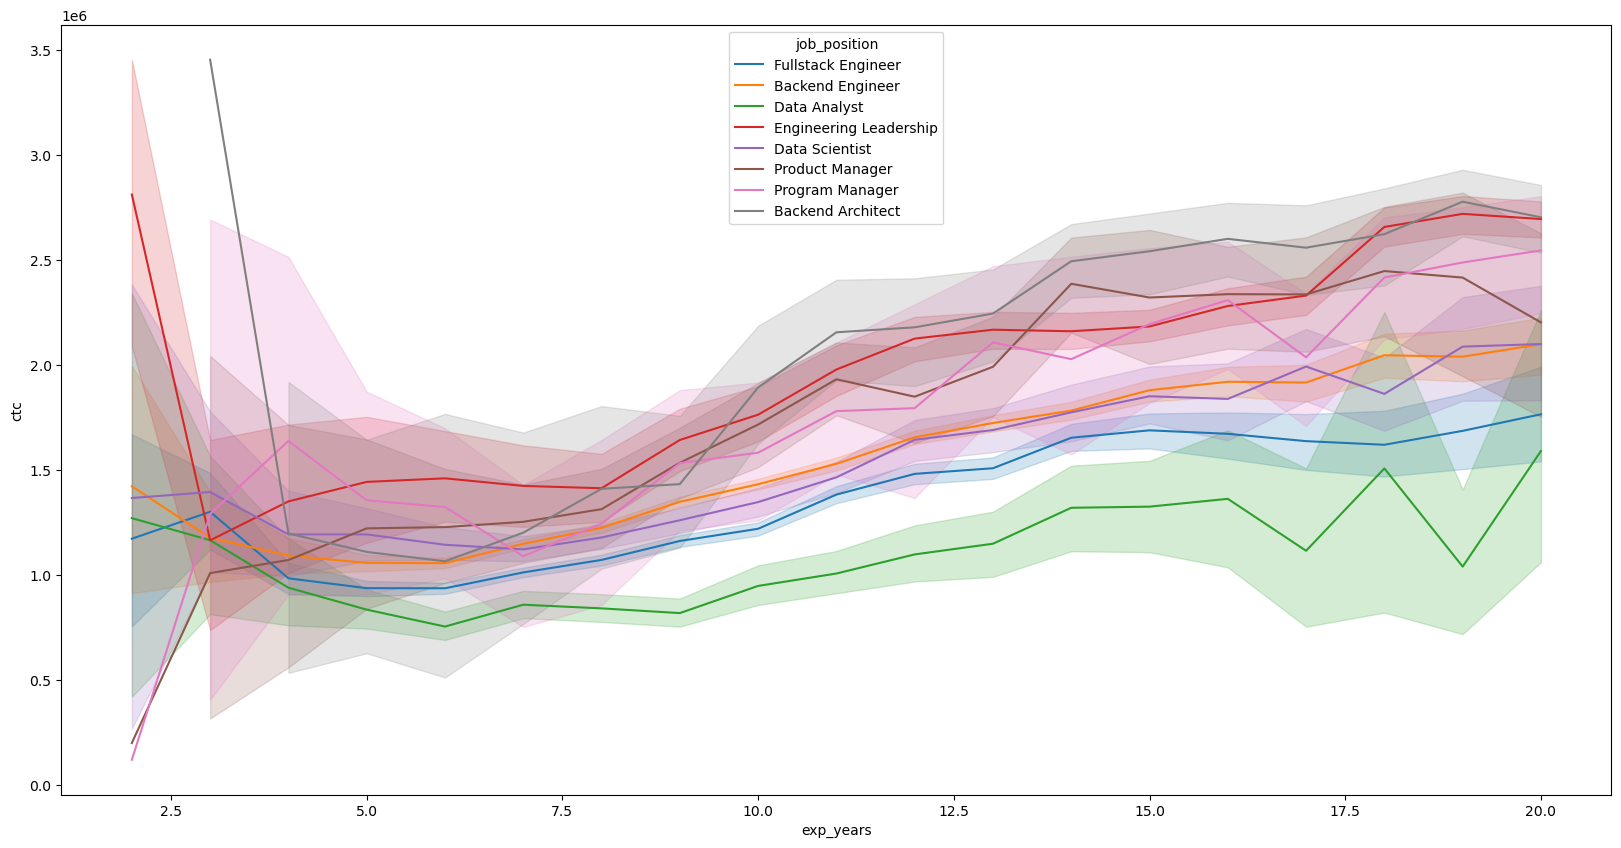

In [252]:
plt.figure(figsize=(20,10))
sns.lineplot(x='exp_years', y='ctc', hue='job_position', data=temp_new)

In [253]:
mean_ctc_by_job_exp=data_copy_new.groupby(['job_position','exp_years'])['ctc'].mean()

In [254]:
mean_exp_by_job=data_copy_new.groupby('job_position')['exp_years'].mean()

In [258]:
data_copy_new=data_copy_new.merge(mean_ctc_by_job_exp, on=['job_position', 'exp_years']).merge(mean_exp_by_job, on='job_position')

In [261]:
data_copy_new.columns

Index(['company_hash', 'email_hash', 'orgyear', 'ctc_x', 'job_position',
       'ctc_updated_year', 'years_to_jump', 'exp_years_x', 'salary_ranges',
       'exp_ranges', 'ctc_y', 'exp_years_y'],
      dtype='object')

In [262]:
#data_copy_new=pd.merge(data_copy_new,mean_ctc_by_job_exp, on=['job_position','exp_years'],how='inner')

In [264]:
data_copy_new.rename(columns={'ctc_x':'ctc','ctc_y':'mean_ctc_job_pos_exp','exp_years_x':'exp_years','exp_years_y':'mean_exp_job'}, inplace=True)

In [269]:
data_copy_new.columns

Index(['company_hash', 'email_hash', 'orgyear', 'ctc', 'job_position',
       'ctc_updated_year', 'years_to_jump', 'exp_years', 'salary_ranges',
       'exp_ranges', 'mean_ctc_job_pos_exp', 'mean_exp_job'],
      dtype='object')

In [270]:
data_copy_new['above_avg_ctc']=(data_copy_new['ctc']>data_copy_new['mean_ctc_job_pos_exp']).astype(int)

In [271]:
data_copy_new['above_avg_exp']=(data_copy_new['exp_years']>data_copy_new['mean_exp_job']).astype(int)

In [272]:
data_copy_new.dtypes

company_hash              object
email_hash                object
orgyear                    int64
ctc                        int64
job_position              object
ctc_updated_year           int64
years_to_jump              int64
exp_years                  int64
salary_ranges           category
exp_ranges              category
mean_ctc_job_pos_exp     float64
mean_exp_job             float64
above_avg_ctc              int64
above_avg_exp              int64
dtype: object

In [273]:
data_copy_new['orgyear'].unique()

array([2016, 2018, 2015, 2017, 2019, 2012, 2013, 2003, 2006, 2014, 2011,
       2020, 2021, 2008, 2022, 2009, 2005, 2010, 2004, 2007, 2002, 2023,
       2001, 1996, 2000, 1999, 1995, 1991, 1998, 1990, 1997, 1988, 1993,
       1992, 1982, 1985, 1994, 1972, 1989, 1987, 1971, 1977, 1986, 1984,
       1970, 1979])

In [274]:
data_new_2=data_copy_new.drop(['company_hash','email_hash','orgyear','ctc_updated_year','mean_ctc_job_pos_exp','mean_exp_job','exp_years','years_to_jump'], axis=1)

In [275]:
data_new_2.salary_ranges.unique()

[2, 0, 3, 1]
Categories (4, int64): [0 < 1 < 2 < 3]

In [276]:
#data_new_2=data_new_2[data_new_2['orgyear'].isin(range(2015,2022))]

In [277]:
data_new_2.dtypes

ctc                 int64
job_position       object
salary_ranges    category
exp_ranges       category
above_avg_ctc       int64
above_avg_exp       int64
dtype: object

In [278]:
data_new_2.isnull().sum()

ctc              0
job_position     0
salary_ranges    0
exp_ranges       0
above_avg_ctc    0
above_avg_exp    0
dtype: int64

In [279]:
dummies=pd.get_dummies(data_new_2['job_position'], drop_first=True).astype(int)

In [298]:
dummies.shape

(149952, 19)

In [300]:
dummies.dtypes

Backend Architect         int64
Backend Engineer          int64
Data Analyst              int64
Data Scientist            int64
Devops Engineer           int64
Engineering Intern        int64
Engineering Leadership    int64
Frontend Engineer         int64
Fullstack Engineer        int64
Non Coder                 int64
Other                     int64
Product Designer          int64
Product Manager           int64
Program Manager           int64
QA Engineer               int64
Research Engineers        int64
SDET                      int64
Support Engineer          int64
iOS Engineer              int64
dtype: object

In [302]:
data_new_2=pd.concat([data_new_2.drop('job_position', axis=1), dummies], axis=1)

In [303]:
data_new_2.shape

(149952, 24)

In [306]:
from sklearn.decomposition import PCA

In [307]:
from sklearn.preprocessing import StandardScaler, RobustScaler, MinMaxScaler

In [308]:
sc=MinMaxScaler() #This works very clearly, standard scaler does not show good results in this particular case

In [312]:
scaled_data=sc.fit_transform(data_new_2)

In [313]:
pca=PCA(n_components=2)

In [316]:
data_pca=pca.fit_transform(scaled_data) 

In [317]:
pca.explained_variance_ratio_

array([0.27335445, 0.17975946])

<Axes: >

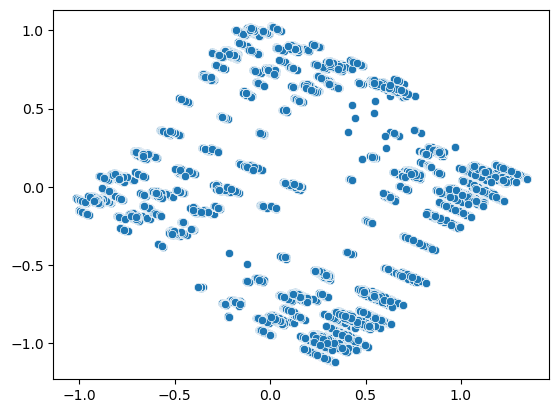

In [320]:
sns.scatterplot(x=data_pca[:,0], y=data_pca[:,1]) 

In [322]:
#Trying umap to see if components can come out more clearly by non linear methods

In [324]:
#This failed to initialize so I am commenting it out, it did not capture the clusters correctly

In [326]:
#pip install umap-learn

In [327]:
#import umap

In [328]:
#sc=RobustScaler()
#scaled_data=sc.fit_transform(data_new_2)

In [329]:
#reducer=umap.UMAP(n_components=2)

In [330]:
#reduced_data=reducer.fit_transform(scaled_data) #This failed 

In [331]:
#sns.scatterplot(x=reduced_data[:,0], y=reduced_data[:,1])

In [332]:
#This requires DBSCAN, we can tell by looking at the data

In [340]:
#dbs=DBSCAN(eps=0.5)

In [342]:
#dbs.fit(scaled_data)

In [343]:
#dbs_labels=dbs.labels_

In [344]:
#dbs_labels #no clusters were formed when we put anything below 0.5 as the radius

In [348]:
#sns.scatterplot(x=reduced_data[:,0], y=reduced_data[:,1], hue=dbs_labels)

In [349]:
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN

In [353]:
from sklearn.metrics import silhouette_score

In [355]:
from sklearn.mixture import GaussianMixture

In [358]:
from scipy.cluster.hierarchy import dendrogram, linkage

In [360]:
data_new_2.shape

(149952, 24)

In [363]:
#silhouette=[]
inertia=[]
for i in range(2,10):
    km=KMeans(n_clusters=i, random_state=10).fit(data_pca)
    km_label=km.labels_
    inertia.append(km.inertia_)
    #silhouette.append(silhouette_score(data_pca,km_label))

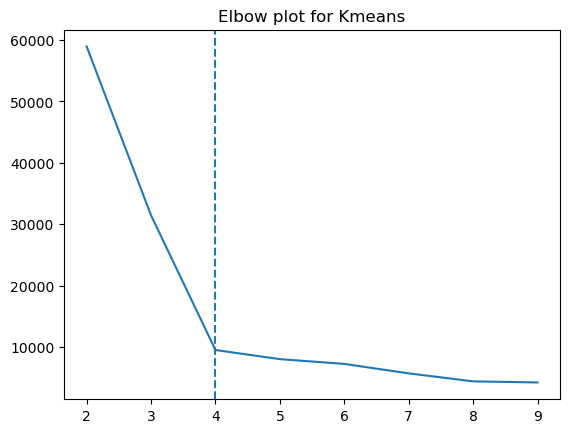

In [366]:
plt.plot(range(2,10), inertia)
#plt.plot(range(2,10), silhouette)
plt.title('Elbow plot for Kmeans')
plt.axvline(4, linestyle='--')
plt.show()

In [368]:
km=KMeans(n_clusters=4, random_state=10)


In [370]:
km_labels=km.fit_predict(data_pca)

In [372]:
km_labels

array([2, 1, 0, ..., 1, 1, 2], dtype=int32)

<Axes: >

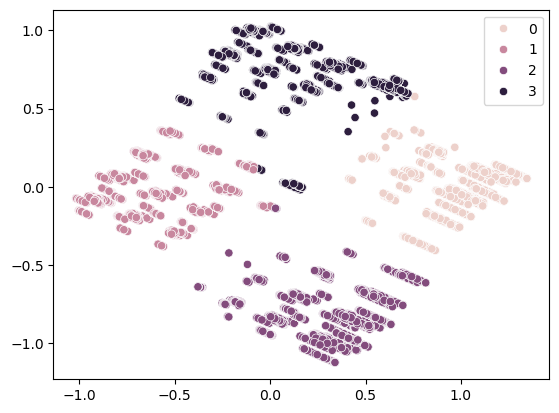

In [374]:
sns.scatterplot(x=data_pca[:,0], y=data_pca[:,1], hue=km_labels) 

In [375]:
silhouette_score(data_pca, km_labels)

0.7122737070162368

In [376]:
gmm=GaussianMixture(n_components=4, random_state=10) #since I see 4 long groups

In [377]:
labels_gmm=gmm.fit_predict(data_pca)

<Axes: >

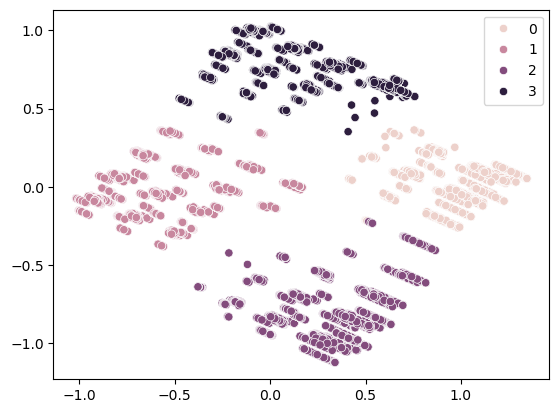

In [378]:
sns.scatterplot(x=data_pca[:,0], y=data_pca[:,1], hue=labels_gmm) #this gives good results, we still have a few noise points to be accounted for

In [379]:
silhouette_score(data_pca, labels_gmm)

0.7110230162888285

In [381]:
#I tried dbscan and it does not give me a good clustering like gmm or kmeans
#It took a long time and hangs 

In [382]:
#dbs=DBSCAN()

In [383]:
#dbs.fit(data_pca)

In [384]:
#dbs_labels=dbs.labels_

In [385]:
#sns.scatterplot(x=data_pca[:,0], y=data_pca[:,1], hue=dbs_labels)

In [386]:
#silhouette_score(data_pca, dbs_labels)

In [388]:
#Now trying agglomerative clustering

In [389]:
linkages=linkage(data_pca[:1000], method='ward') #taking a sample just to reduce the time taken

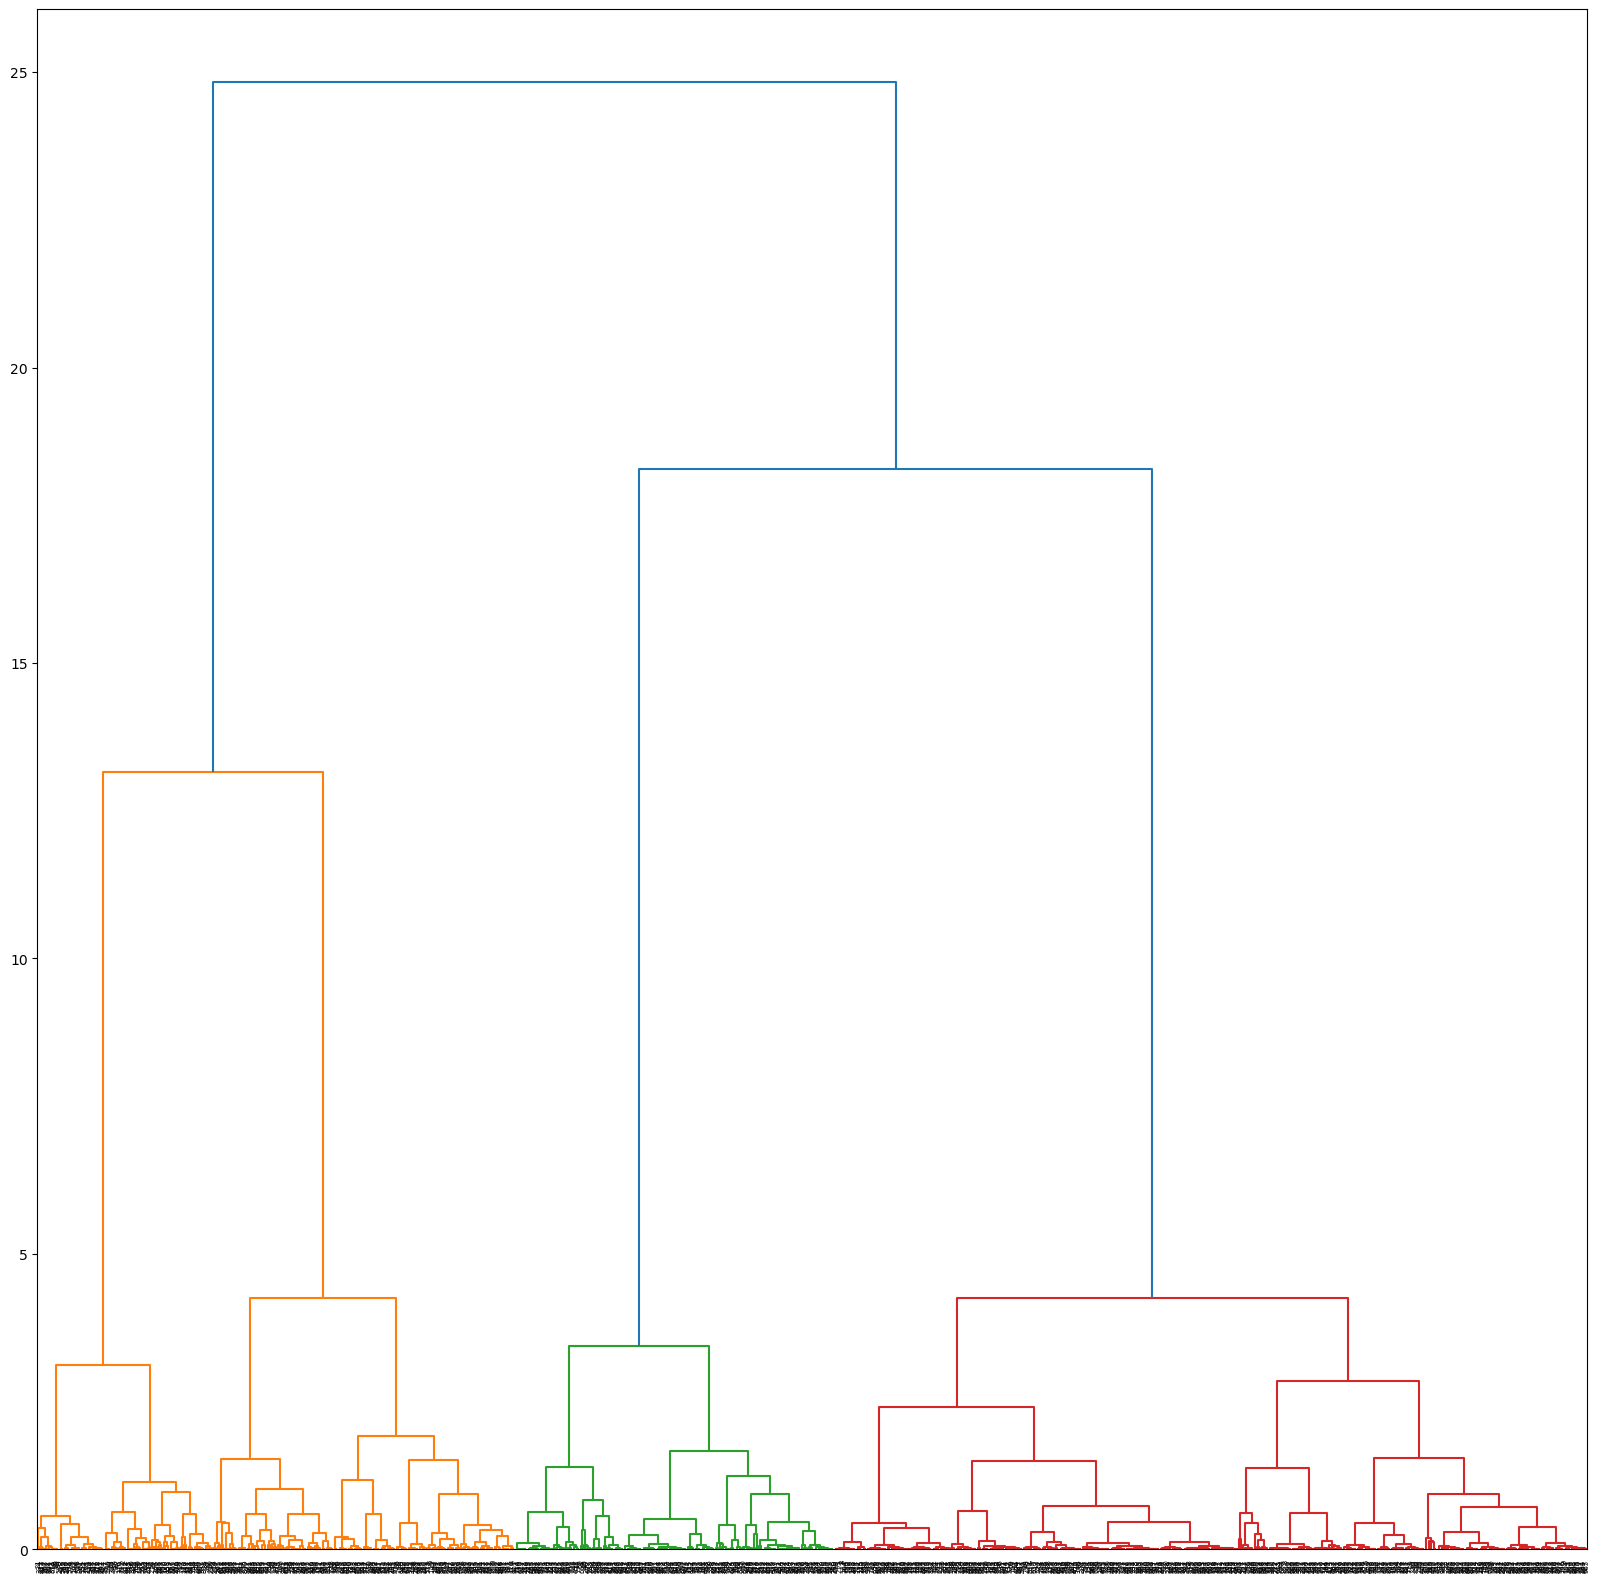

In [390]:
plt.figure(figsize=(20,20))
dendogram=dendrogram(linkages)

In [391]:
agg_clusters=AgglomerativeClustering(n_clusters=4).fit(data_pca[:1000])

<Axes: >

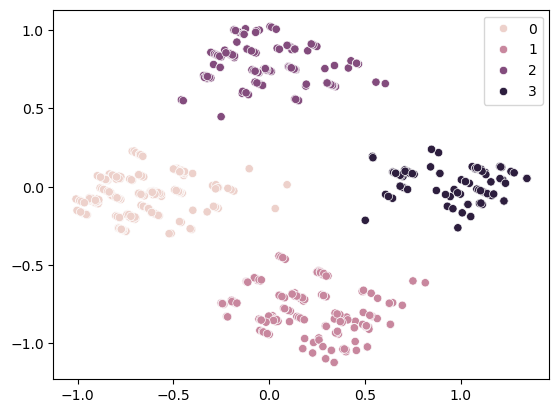

In [392]:
sns.scatterplot(x=data_pca[:1000,0],y=data_pca[:1000,1], hue=agg_clusters.labels_)

In [393]:
silhouette_score(data_pca[:1000], agg_clusters.labels_) #This silhouette score is better than the .712 we saw using KMeans

0.7197618481555553

In [394]:
#Conclusions and recommendations

In [395]:
#1. The most sought after jobs are technical in nature, mainly backend and front end engineer
#The jobs which are highest sought after are not the highest paying, the higher paying jobs are backend architect and engineering leadership
#This is an opportunity for scaler to align people to focus on more architecture level jobs compared to engineering level jobs
#For example, they can train people to look at product manager or program manager jobs instead of looking at data scientist jobs
#2. It is possible to predict the ctc trajectory till 15 years of experience.
#After that there is a large increase in variation in the ctc, which means the ctc depends more on other factors.
#This means that people who have around 15 years or more should look at areas other than experience and technical skills to get a good ctc.
#3. The highest salaries for all the highest paying jobs are the same-which again confirms that the salary at that level does not depend much on the job position.
#However at the lowest levels, it will varies with the job position - it is more for backend architect and engg leadership roles.
#4. The ctcs follow a similar trajectory for backend architect, program manager and engg leadership roles, and similarly for backend engineer and data scientist roles
#So these 3 roles should be treated on parallel-one for the technical architecture stream, and one for the engineering stream, and one for the delivery stream.
#This gives us an idea that the career pathways for these 3 are similar and they might form one cluster 
#(I dont know for sure since I did pca to reduce the dimensions as it was taking a long time and my kernel was dying otherwise, my understanding from eda is that these should form one cluster each)
#We see that the variation from the mean ctc is very narrow until people reach about 15-20 years of experience, hence if the experience level is less than 15 years it should be similar and form one cluster
#5. We see that the most updates to the ctc happen within 3-5 years of joining beyond which the updates reduce.
#Hence the recommendation is that the best time to jump to a new job is anywhere beyond 5 years.

#Results from pca and clustering
#I tried using min max scaler and it works best when we see it visually, using standard scaler gave all the points jumbled together after pca.
#I understand there should be around 4 clusters + some noise, we are able to see the clusters very clearly.
#Agglomerative clustering yielded the best result with a silhouette score of .719 which is better than that obtained from KMeans or GMM 


#Final recommendations
#1. Scaler should align its students and courses to one of 3 tracks in terms of their career journey-the technical architecture track, the engineering track, and the delivery track
#2. For people with 15-30 years of experience, it is obvious that factors other than experience are more important-Hence Scaler should identify these aspects and train such learners separately.
#3. Scaler should continue to keep students of 10 years of experience or below if it wants to predict their ctc growth trajectory accurately.